In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
import random

In [2]:
from keras import layers

In [3]:
my_list = list(range(1, 202599));
random.shuffle(my_list);

In [4]:
input_img1 = keras.Input(shape=(220, 180, 3))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img1)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded1 = layers.MaxPooling2D((2, 2), padding='same')(x)

encoder1 = keras.Model(input_img1, encoded1)
encoded_input1 = keras.Input(shape = (None, 55, 45, 32)) 

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded1)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded2 = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder1 = keras.Model(input_img1, decoded2)
autoencoder1.compile(optimizer='adam', loss='binary_crossentropy')

decoded1 = autoencoder1.layers[-1]
decoder1 = keras.Model(encoded_input1, decoded1(encoded_input1))

In [14]:
x_train = list()
for i in range(1100,2100):
    x_train.append((np.pad(image.imread("../img_align_celeba/"  + "000000"[0:(6 - len(str(my_list[i])))] + str(my_list[i]) + ".jpg").reshape(218, 178, 3), ((1,1),(1,1),(0,0)), "edge")))
x_train = np.array(x_train)
x_train = x_train.astype('float32') / 255.

In [15]:
x_test = list()
for i in range(2100, 2200):
    x_test.append((np.pad(image.imread("../img_align_celeba/"  + "000000"[0:(6 - len(str(my_list[i])))] + str(my_list[i]) + ".jpg").reshape(218, 178, 3), ((1,1),(1,1),(0,0)), "edge")))
x_test = np.array(x_test)
x_test = x_test.astype('float32') / 255.

In [16]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [17]:
autoencoder1.fit(x_train_noisy, x_train,
                epochs=1,
                batch_size=5,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

200/200 [==============================] - 127s 628ms/step - loss: 0.4915 - val_loss: 0.4874


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


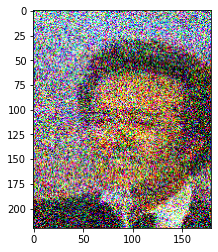

In [18]:
temp = list()
temp.append(np.pad(image.imread("../img_align_celeba/000321.jpg").reshape(218, 178, 3), ((1,1),(1,1),(0,0)), "edge"))
temp.append(np.pad(image.imread("../img_align_celeba/001567.jpg").reshape(218, 178, 3), ((1,1),(1,1),(0,0)), "edge"))
temp_test = np.array(temp)
temp_test = temp_test.astype('float32') / 255.

test_noise = temp_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=temp_test.shape) 
plt.imshow(test_noise[0])
test_noise = np.clip(test_noise, 0., 1.)

decoded_imgs = autoencoder1.predict(test_noise)

# encoded_imgs1 = encoder1.predict(x_test)
# decoded_imgs1= decoder1.predict(encoded_imgs1)

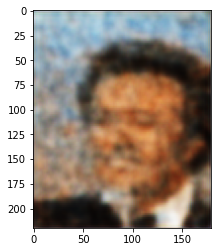

In [19]:
plt.imshow(decoded_imgs[0])

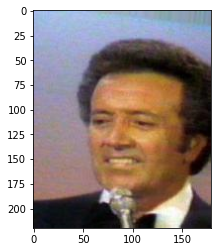

In [22]:
plt.imshow(temp_test[0])

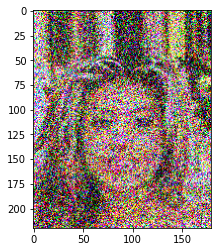

In [20]:
plt.imshow(test_noise[1])

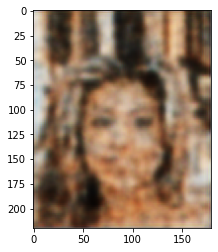

In [21]:
plt.imshow(decoded_imgs[1])